In [7]:
import matplotlib
import geopandas as gpd
import mapclassify as mc
# import matplotlib.pyplot as plt
import pandas as pd
from osgeo import gdal
from digitalearth.static import Map
rpath = r"C:\gdrive\01Algorithms\Visualization\Digital-Earth"
saveto = rf"{rpath}\examples\data\results"

In [9]:
src = gdal.Open(f"{rpath}\examples/data/acc4000.tif")
src_no_data_value = src.GetRasterBand(1).GetNoDataValue()
cmap = "terrain"

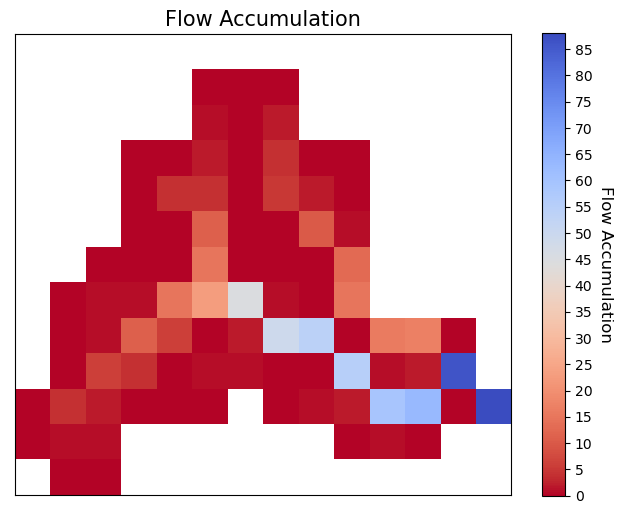

In [10]:
fig, ax = Map.plot(src, title="Flow Accumulation", cbar_label="Flow Accumulation")

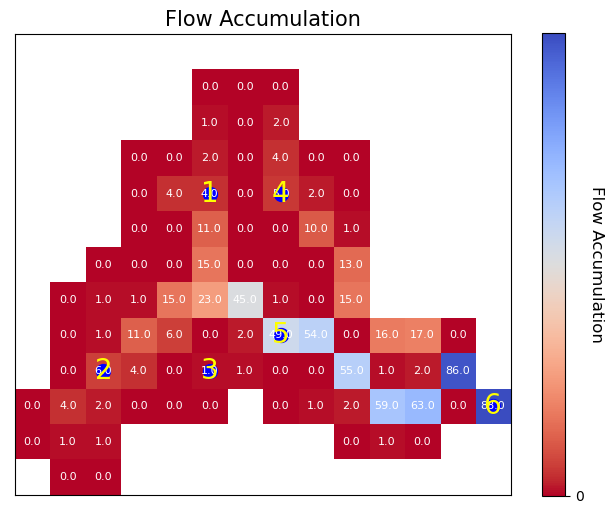

In [12]:
points = pd.read_csv(f"{rpath}\examples/data/points.csv")
# fig, ax = Map.plot(src, title="Flow Accumulation", points=points)

point_color = "blue"
point_size = 100
id_color = "yellow"
id_size = 20

display_cellvalue = True
num_size = 8
background_color_threshold = None
ticks_spacing = 500

fig, ax = Map.plot(
            src,
            point_color=point_color,
            point_size=point_size,
            pid_color=id_color,
            pid_size=id_size,
            points=points,
            display_cellvalue=display_cellvalue,
            num_size=num_size,
            background_color_threshold=background_color_threshold,
            ticks_spacing=ticks_spacing,
            title="Flow Accumulation",
            cbar_label="Flow Accumulation"
        )

MultiPolygon
MultiLineString
Point
Index(['index', 'rmse', 'KGE', 'WB', 'NSE', 'NSEModified', 'MBE', 'MAE', 'gid',
       'name', 'oid', 'river', 'id', 'xsid', 'datum(m)', 'discharge',
       'waterlevel', 'source', 'Qstart', 'Qend', 'WLstart', 'WLend',
       'geometry'],
      dtype='object')
epsg:3035
epsg:3035
epsg:3035


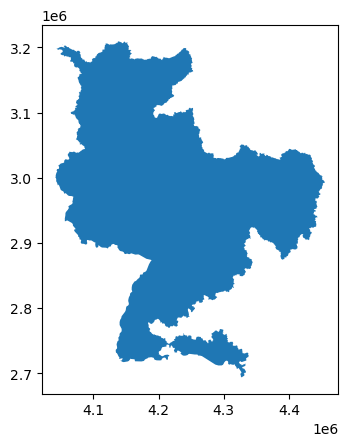

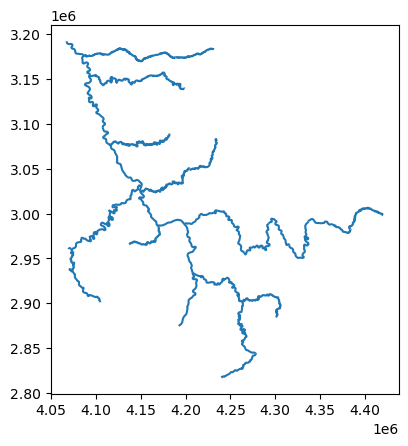

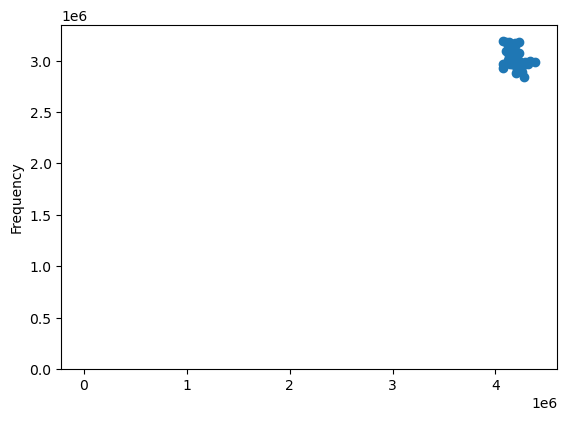

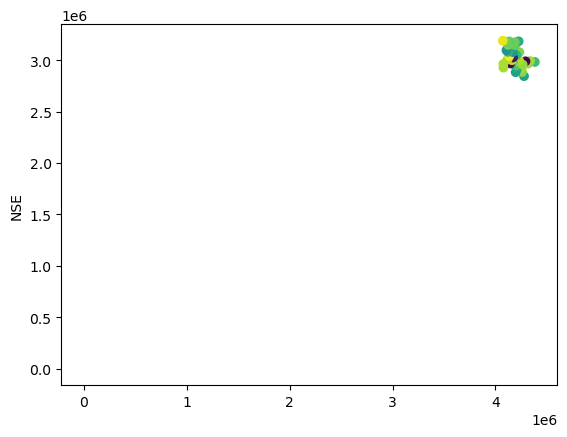

In [14]:
# read the polygon , line, and point data
rhine_basin = gpd.read_file(f"{rpath}/examples/data/rhine_basin.geojson")
print(rhine_basin.loc[0, "geometry"].geom_type)
rhine_basin.plot()
rhine_river = gpd.read_file(f"{rpath}/examples/data/rhine_river_centerline.geojson")
print(rhine_river.loc[0, "geometry"].geom_type)
rhine_river.plot()
metrix = gpd.read_file(f"{rpath}/examples/data/MetricsHM_Q_Obs.geojson")
print(metrix.loc[0, "geometry"].geom_type)
metrix.plot()

"The columns that we can plot its values in the dataframe"
print(metrix.columns)
"Check the projection"
print(rhine_river.crs)
print(rhine_basin.crs)
print(metrix.crs)


plot_column = "NSE"

metrix[plot_column] = metrix[plot_column].map(float)
"check the histogram for the values that you are going to plot using the bubble plot"
metrix.loc[:, plot_column].plot.hist(bins=7)
"plot "
ax = metrix.plot(column=plot_column)
"plot the values against the index"
ax = metrix.loc[:, plot_column].plot()
ax.set_xlabel("")
ax.set_ylabel("NSE")


filterMin = None
filterMax = None

# filter some values out
if filterMin:
    metrix.loc[metrix[plot_column] < filterMin, plot_column] = filterMin
if filterMax:
    metrix.loc[metrix[plot_column] > filterMax, plot_column] = filterMax

2022-12-25 01:29:23.786 | DEBUG    | digitalearth.static:plotCatchment:194 - The coordinate system of the poly geodataframe is not geographicSO, it will be reprojected to WGS-84


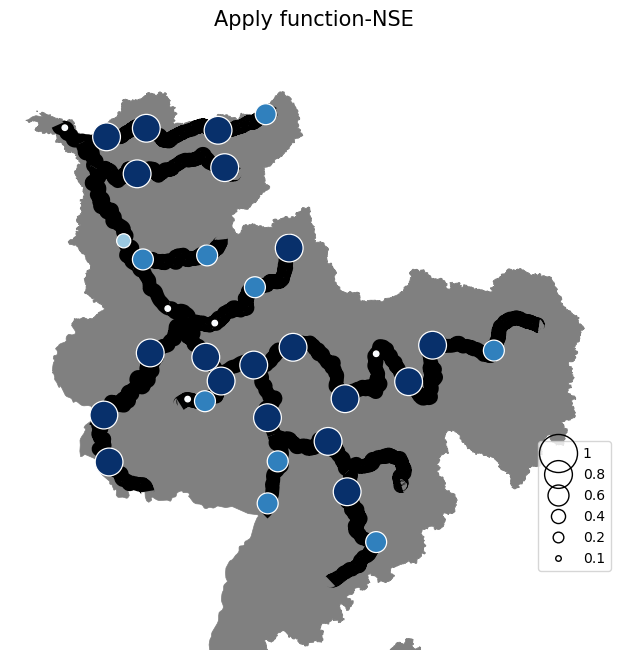

In [15]:
"apply the function that calculates a size based on the values in the column"

def scale_func(x):
    if x >= 1:
        return 20
    elif 0.6 <= x < 0.8:
        return 14
    elif 0.4 <= x < 0.6:
        return 10
    elif 0.2 <= x < 0.4:
        return 6
    elif 0.1 <= x < 0.2:
        return 4
    else:
        return 1


title = f"Apply function-{plot_column}"
new_col = f"{plot_column}-size"
metrix[new_col] = metrix[plot_column].apply(scale_func)

legend_values = [20, 14, 10, 6, 4, 1]
legend_labels = [1, 0.8, 0.6, 0.4, 0.2, 0.1]

cmap = 'Blues'
linewidth = 0.2

fig, ax = Map.plotCatchment(
    metrix, new_col, rhine_basin, rhine_river,
    title=title, title_size=15,
    legend_values=legend_values,
    legend_labels=legend_labels,
    cmap=cmap,
    linewidth=linewidth,
    save=rf"{saveto}\{title}.tif"
)

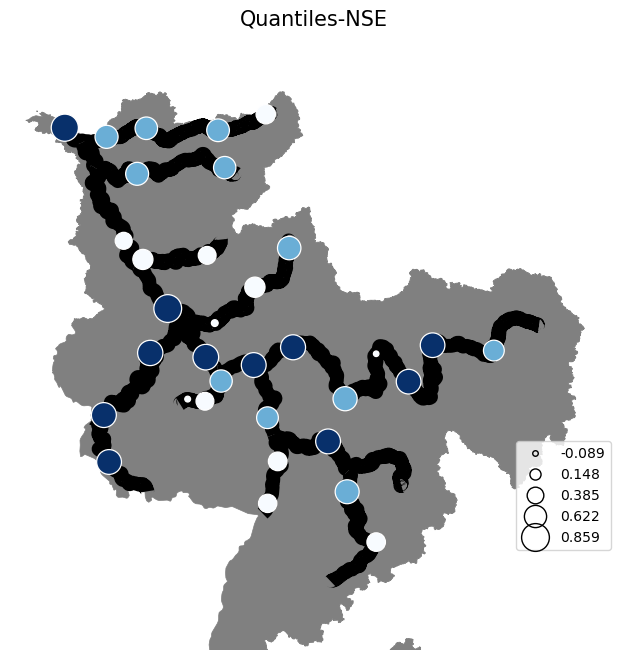

In [16]:
scheme = mc.Quantiles(metrix[plot_column].map(float), k=3)
title = f"Quantiles-{plot_column}"
cmap = 'Blues'
linewidth = 0.2

fig, ax = Map.plotCatchment(
    metrix, plot_column, rhine_basin, rhine_river,
    title=title, title_size=15,
    scheme=scheme,
    cmap=cmap,
    linewidth=linewidth,
    save=rf"{saveto}\{title}.tif"
)

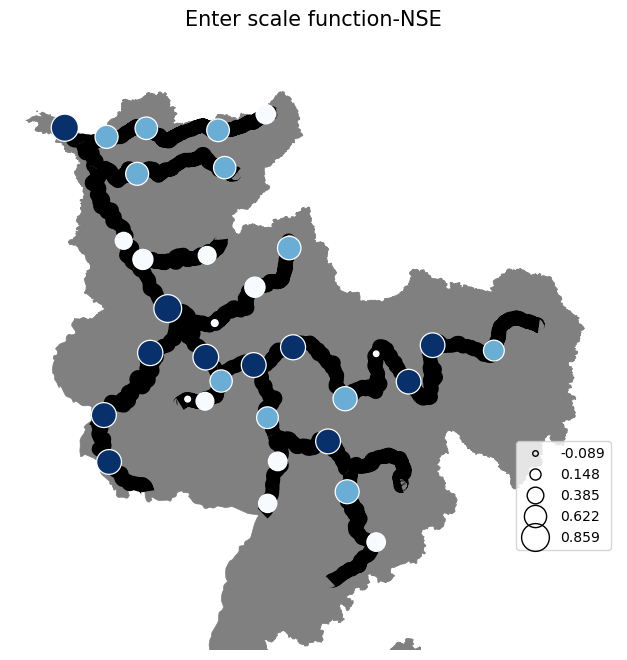

In [17]:
title = f"Enter scale function-{plot_column}"
scale_func = scale_func
# legend_values = [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0]

cmap = 'Blues'
linewidth = 0.2

fig, ax = Map.plotCatchment(
    metrix, plot_column, rhine_basin, rhine_river,
    title=title, title_size=15,
    scheme=scheme,
    scale_func = scale_func,
    # legend_values = legend_values,
    # legend_labels = legend_values,
    cmap=cmap,
    linewidth=linewidth,
    save=rf"{saveto}\{title}.tif"
)